In [3]:
import sys
import os
from pathlib import Path

sys.path.append(sys.path[0] + '/src')

import torch
import pandas as pd
from extracting_embedding import extract_embedding
from visualization import tsne,visualize
import utils

# import visualization
# import importlib 
# importlib.reload(visualization)

device = utils.getting_device()
#load data from file
all_df=pd.read_csv("data/RosettaCodeData.csv")


languages = ['C-sharp', 'PowerShell', 'Julia', 'Groovy', 'Java', 'Tcl', 'Go', 'Swift', 'ALGOL-68', 'Common-Lisp']

filtered_df = all_df.dropna()
rows_to_drop = filtered_df["task"].str.contains('Empty-program')
df = filtered_df[~rows_to_drop]

part_df = df[df['language'].isin(languages)].reset_index(drop=True)

device: cuda


In [5]:
import extracting_embedding
import importlib 
importlib.reload(extracting_embedding)
from extracting_embedding import extract_embedding

In [7]:
bert_path = extract_embedding(part_df, device, model='bert', max_len = 100)
bert_path

out/bert_12060.pt
Model vertified: BERT


Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Starting extract embeddings......
Time elapsed: 2579.33 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([12060, 768])


'out/bert_12060.pt'

In [8]:
bert_emb = torch.load(bert_path, map_location="cpu")

In [9]:
tsne_df = tsne(bert_emb, part_df)

torch.Size([12060, 768]) 10 1224
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12060 samples in 0.003s...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[t-SNE] Computed neighbors for 12060 samples in 1.771s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12060
[t-SNE] Computed conditional probabilities for sample 2000 / 12060
[t-SNE] Computed conditional probabilitie

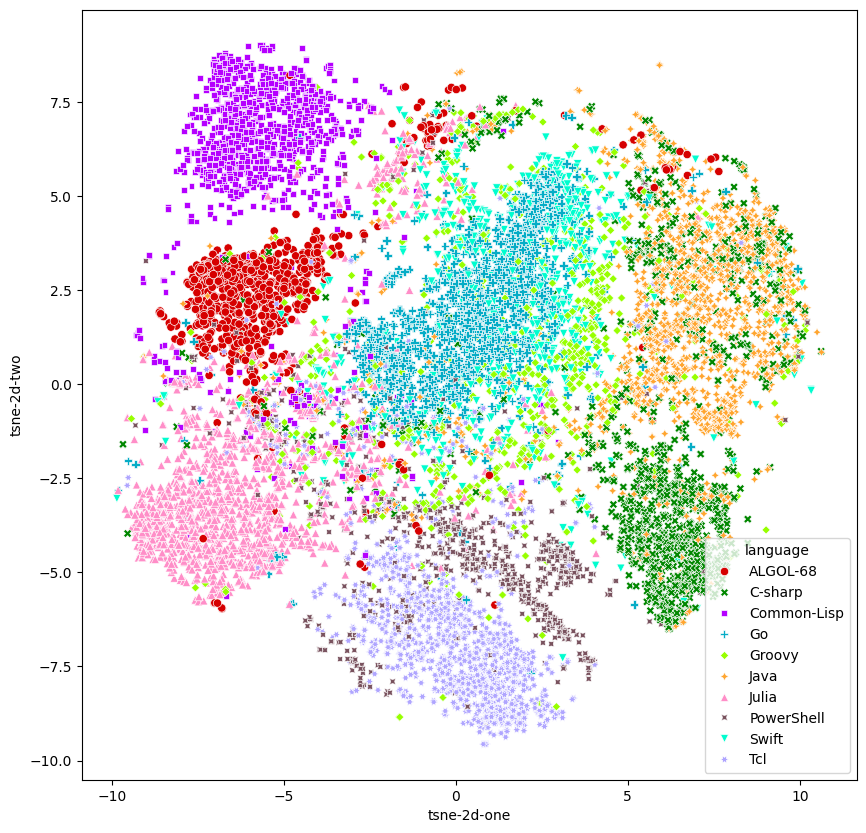

In [12]:
visualize(tsne_df, part_df, model = 'bert', data_type = 'language')

In [13]:
gpt_path = extract_embedding(part_df, device, model='gpt', max_len = 100)
## gpt_path = 'out/bert_14802.pt'
gpt_emb = torch.load(gpt_path, map_location="cpu")

out/gpt_12060.pt
Model vertified: GPT
Starting extract embeddings......
Time elapsed: 3890.68 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([12060, 768])


In [14]:
tsne_df = tsne(gpt_emb, part_df)

torch.Size([12060, 768]) 10 1224
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12060 samples in 0.003s...
[t-SNE] Computed neighbors for 12060 samples in 1.438s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12060
[t-SNE] Computed conditional probabilities for sample 2000 / 12060
[t-SNE] Computed conditional probabilities for sample 3000 / 12060
[t-SNE] Computed conditional probabilities for sample 4000 / 12060
[t-SNE] Computed conditional probabilities for sample 5000 / 12060
[t-SNE] Computed conditional probabilities for sample 6000 / 12060
[t-SNE] Computed conditional probabilities for sample 7000 / 12060
[t-SNE] Computed conditional probabilities for sample 8000 / 12060
[t-SNE] Computed conditional probabilities for sample 9000 / 12060
[t-SNE] Computed conditional probabilities for sample 10000 / 12060
[t-SNE] Computed conditional probabilities for sample 11000 / 12060
[t-SNE] Computed conditional probabilities for sample 12000 / 12060
[t-SNE] Computed

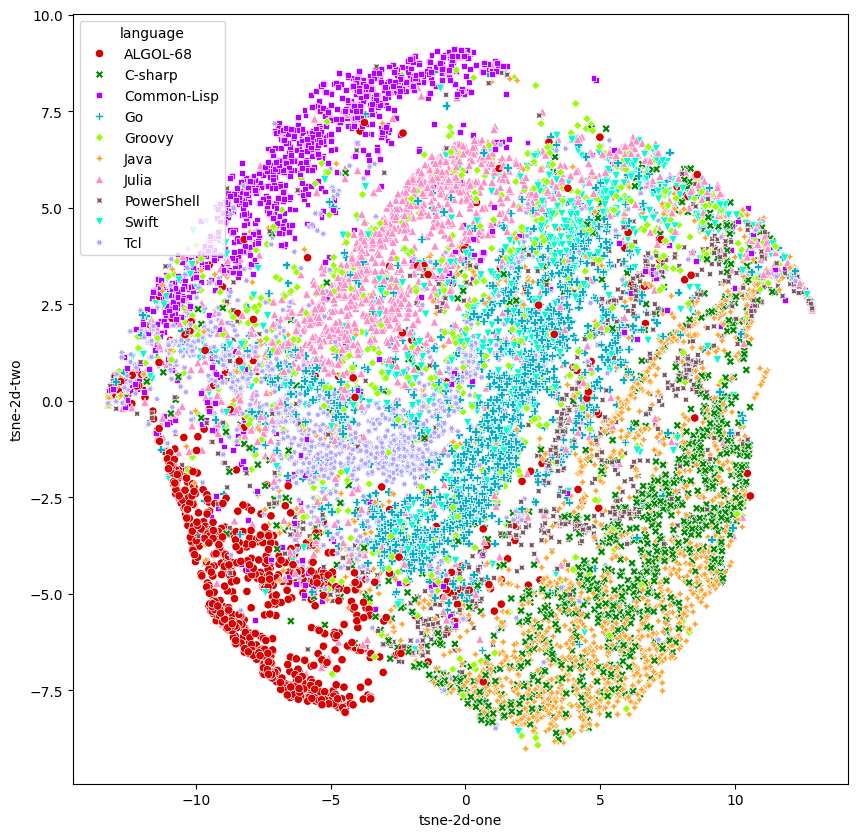

In [15]:
visualize(tsne_df, part_df, model = 'gpt', data_type = 'language')